# Supervised Learning Project


GitHub Link: https://github.com/sseggeb/MSDS_5509_Final_Pro.git

## Problem Description
NYC Taxi Data - Predicting Trip Duration
yellow taxi trip data for March, 2025

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")

print("Path to dataset files:", path)

C:\Users\spencer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\spencer\.cache\kagglehub\datasets\elemento\nyc-yellow-taxi-trip-data\versions\2


In [43]:
import pandas as pd

df = pd.read_parquet(path+"/yellow_tripdata_2025-03.parquet")

## EDA Procedure

In [44]:
# prints the first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.9,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.5,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.9,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.2,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.6,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75


In [45]:
# gives you the number of rows and columns
df.shape

(4145257, 20)

In [46]:
#provides a summary of the DataFrame, including column names, non-null counts, and data types, which is crucial for the next step (datetime conversion).
df.info

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2025-03-01 00:17:16   2025-03-01 00:25:52              1.0   
1               1  2025-03-01 00:37:38   2025-03-01 00:43:51              1.0   
2               2  2025-03-01 00:24:35   2025-03-01 00:39:49              1.0   
3               2  2025-03-01 00:56:16   2025-03-01 01:01:35              2.0   
4               1  2025-03-01 00:01:44   2025-03-01 00:10:00              1.0   
...           ...                  ...                   ...              ...   
4145252         2  2025-03-31 23:10:10   2025-03-31 23:42:49              NaN   
4145253         2  2025-03-31 23:14:47   2025-03-31 23:32:05              NaN   
4145254         2  2025-03-31 23:18:16   2025-03-31 23:40:15              NaN   
4145255         2  2025-03-31 23:30:16   2025-03-31 23:52:23              NaN   
4145256         2  2025-03-31 23:26:26   2025-03-31 23:48:30              NaN

In [ ]:
#Missing values
print(df.isnull().sum())

Insights: We can see that there are some NaN values showing up here and 'None' values where it should be a Y or N.  We also see a negative value for fare.  Making a note to handle these later.

In [48]:
initial_rows = df.shape[0]

df = df.dropna(subset = ['passenger_count'])

rows_after_nan_removal = df.shape[0]

print(f"\nRemoved {initial_rows - rows_after_nan_removal} rows with NaN values: 'passenger_count'.")
print(f"New DataFrame shape: {df.shape}")

df.info


Removed 916663 rows with NaN values: 'passenger_count'.
New DataFrame shape: (3228594, 20)


<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2025-03-01 00:17:16   2025-03-01 00:25:52              1.0   
1               1  2025-03-01 00:37:38   2025-03-01 00:43:51              1.0   
2               2  2025-03-01 00:24:35   2025-03-01 00:39:49              1.0   
3               2  2025-03-01 00:56:16   2025-03-01 01:01:35              2.0   
4               1  2025-03-01 00:01:44   2025-03-01 00:10:00              1.0   
...           ...                  ...                   ...              ...   
3228589         2  2025-03-31 23:08:46   2025-03-31 23:16:42              1.0   
3228590         2  2025-03-31 23:12:36   2025-03-31 23:32:02              2.0   
3228591         1  2025-03-31 23:39:28   2025-03-31 23:42:39              1.0   
3228592         1  2025-03-31 23:49:49   2025-04-01 00:06:45              2.0   
3228593         2  2025-03-31 23:10:05   2025-03-31 23:22:03              1.0

Dropping rows with NaN for passenger_count ended up dropping the other values that were NaN or None as well.

In [49]:
# Get summary statistics for numerical columns
# This applies to numerical columns but not all of them
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.228594e+06,3228594,3228594,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06,3.228594e+06
mean,1.815767e+00,2025-03-16 13:26:11.151300,2025-03-16 13:42:08.130030,1.291120e+00,3.359599e+00,2.423492e+00,1.650912e+02,1.645051e+02,1.227550e+00,1.798876e+01,1.559957e+00,4.725685e-01,3.565910e+00,5.468235e-01,9.450442e-01,2.736689e+01,2.219394e+00,1.351228e-01,5.450646e-01
min,1.000000e+00,2007-12-05 18:45:00,2007-12-05 19:02:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.990000e+02,-9.250000e+00,-5.000000e-01,-9.209000e+01,-1.421700e+02,-1.000000e+00,-1.000000e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-03-08 17:34:33.250000,2025-03-08 17:49:36,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-03-16 08:59:26.500000,2025-03-16 09:15:18,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.940000e+00,0.000000e+00,1.000000e+00,2.075000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-03-24 09:59:35,2025-03-24 10:16:53,1.000000e+00,3.180000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.410000e+00,0.000000e+00,1.000000e+00,2.957000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-04-01 00:00:17,2025-04-03 14:07:50,9.000000e+00,6.973519e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,4.626388e+04,1.350000e+01,4.750000e+00,2.900000e+02,9.168700e+02,1.000000e+00,4.626944e+04,2.500000e+00,6.750000e+00,1.250000e+00
std,5.915169e-01,NaN,NaN,7.317500e-01,6.398048e+01,1.136010e+01,6.315364e+01,6.901236e+01,6.023158e-01,3.212132e+01,1.961469e+00,1.521739e-01,4.004449e+00,2.272446e+00,3.071884e-01,3.536009e+01,9.155162e-01,4.996508e-01,3.579596e-01


min pickup and dropoff dates are prior to 03/2025, so we'll drop those.

In [50]:
# Add hour, day, and weekend features based on temporal data
df.loc[:, 'hour_of_day'] = df.loc[:, 'tpep_pickup_datetime'].dt.hour
df.loc[:, 'day_of_week'] = df.loc[:, 'tpep_pickup_datetime'].dt.dayofweek # Monday=0, Sunday=6
df.loc[:, 'is_weekend'] = df.loc[:, 'day_of_week'].isin([5, 6]).astype(int) # 1 if weekend, 0 if weekday

C:\Users\spencer\AppData\Local\Temp\ipykernel_40804\3655450627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'hour_of_day'] = df.loc[:, 'tpep_pickup_datetime'].dt.hour
C:\Users\spencer\AppData\Local\Temp\ipykernel_40804\3655450627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'day_of_week'] = df.loc[:, 'tpep_pickup_datetime'].dt.dayofweek # Monday=0, Sunday=6
C:\Users\spencer\AppData\Local\Temp\ipykernel_40804\3655450627.py:4: SettingWithCopyWarning: 
A value is trying to be 

In [51]:
# only dates in March, 2025
initial_rows = df.shape[0]

df = df[(df.loc[:, 'tpep_pickup_datetime'].dt.month == 3) & (df.loc[:, 'tpep_pickup_datetime'].dt.year == 2025)]
rows_after_datetime_removal = df.shape[0]

print(f"\nRemoved {initial_rows - rows_after_datetime_removal} rows to restrict data to March, 2025.")
print(f"New DataFrame shape: {df.shape}")


Removed 33 rows to restrict data to March, 2025.
New DataFrame shape: (3228561, 23)


In [53]:
# Target Variable - trip duration in minutes
# convert dropoff and pickup to datetime objects, then convert to seconds, then convert to minutes
# max trip duration is over 6000 minutes.  Need to check/handle outliers.
df.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(df.loc[:, 'tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(df.loc[:, 'tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df.loc[:, 'trip_duration'] = (df.loc[:, 'tpep_dropoff_datetime'] - df.loc[:, 'tpep_pickup_datetime']).dt.total_seconds()/60

df.loc[:, 'trip_duration'].describe()

count    3.228561e+06
mean     1.594967e+01
std      3.045188e+01
min     -3.431667e+01
25%      7.150000e+00
50%      1.178333e+01
75%      1.910000e+01
max      6.275833e+03
Name: trip_duration, dtype: float64

Insights: VendorID, RatecodeID, PU and DO Location IDs, and payment_type should all be converted to categorical data types.  There are some negative values in trip_duration, need to handle those.

In [55]:
# removing rows with negative or 0 trip duration
initial_rows = df.shape[0]
df = df[df['trip_duration'] > 0]
rows_after_negtripduration_removal = df.shape[0]

print(f"\nRemoved {initial_rows - rows_after_negtripduration_removal} rows with negative or 0 trip duration.")
print(f"New DataFrame shape: {df.shape}")


Removed 22101 rows with negative or 0 trip duration.
New DataFrame shape: (3206460, 24)


In [56]:
# Columns to convert to category
categorical_cols = [
    'VendorID',
    'RatecodeID',
    'payment_type',
    'PULocationID',
    'DOLocationID',
    'hour_of_day',
    'day_of_week',
    'is_weekend',
]

# Convert columns to 'category' dtype
for col in categorical_cols:
    if col in df.columns: # Check if column exists
        df[col] = df[col].astype('category')

In [57]:
# Get count information on the categorical features.
for col in categorical_cols:
    print(f"\nCounts for {col}:")
    print(df[col].value_counts(dropna=False))


Counts for VendorID:
VendorID
2    2504815
1     701645
Name: count, dtype: int64

Counts for RatecodeID:
RatecodeID
1.0     3000439
2.0      111921
99.0      43850
5.0       31864
3.0       10583
4.0        7800
6.0           3
Name: count, dtype: int64

Counts for payment_type:
payment_type
1    2685387
2     402816
4      91579
3      26678
Name: count, dtype: int64

Counts for PULocationID:
PULocationID
132    160499
161    160441
237    154853
236    133873
186    122899
        ...  
199         2
251         1
109         1
206         1
187         1
Name: count, Length: 257, dtype: int64

Counts for DOLocationID:
DOLocationID
236    144810
237    137766
161    123031
230    103891
170     95672
        ...  
44         18
59         16
5           7
204         5
2           5
Name: count, Length: 259, dtype: int64

Counts for hour_of_day:
hour_of_day
18    231047
17    224860
16    207178
19    203001
15    201025
14    193571
20    192358
21    192091
13    180557
12    171

Insights: It appears that during the data cleaning stage we've completely eliminated 2 of the vendors, Myle Technologies and Helix (VendorID = 6,7).  Could have been an issue collecting data from those two vendors.  We've also eliminated a few of the payment_types, 0, 5, and 6 (Flex Fare, Unknown, and Voided trip).

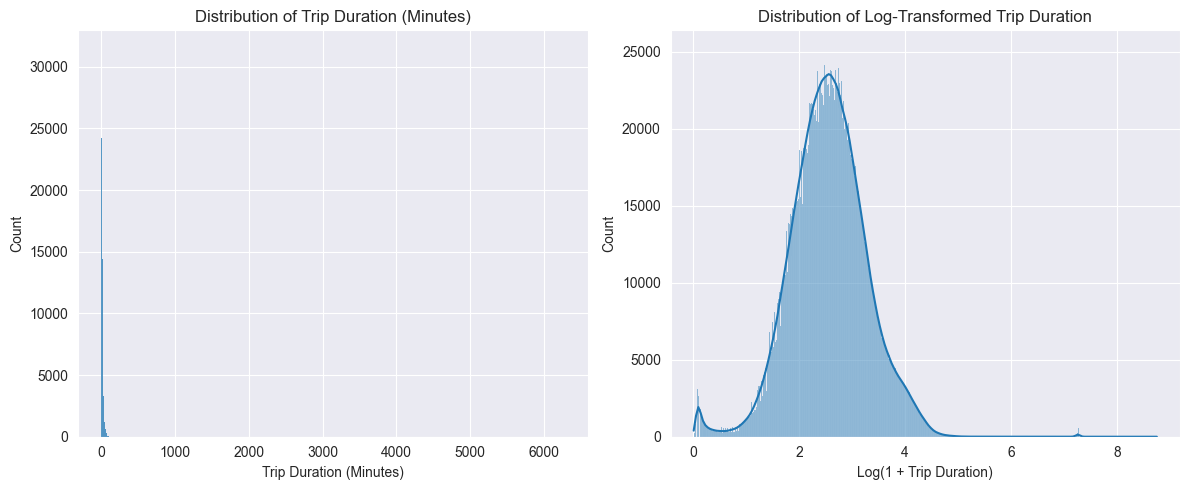

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of trip_duration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'])
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')

# Log transform for more 'normal' distribution
df.loc[:, 'log_trip_duration'] = np.log1p(df.loc[:, 'trip_duration'])  # log1p handles 0

plt.subplot(1, 2, 2)
sns.histplot(df['log_trip_duration'], kde=True)
plt.title('Distribution of Log-Transformed Trip Duration')
plt.xlabel('Log(1 + Trip Duration)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

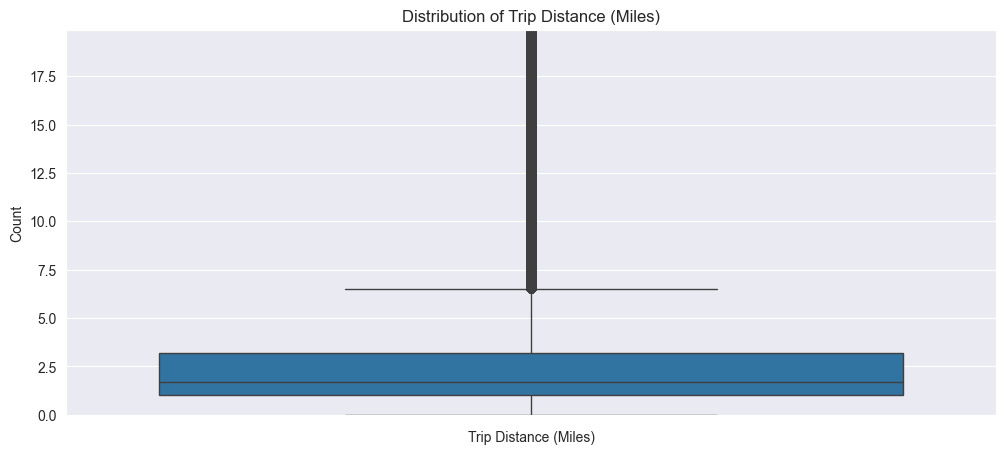

In [74]:
plt.figure(figsize=(12, 5))
#sns.histplot(df['trip_distance'], bins=50, kde=True)
sns.boxplot(df['trip_distance'])
plt.title('Distribution of Trip Distance (Miles)')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Count')
plt.ylim(0, df['trip_distance'].quantile(0.99))
plt.show()

Insights: It appears that the overwhelming majority of trips logged a trip_distance of 0.  Also, there are extreme outliers, trips with thousands of miles, that make the trip_distance column fairly useless.  These rows have passenger_counts (and other columns) with NaN values and appear to be bad rows altogether.  I'm considering dropping the rows altogether.  I was hoping to have a distance column as I think it would prove to be valuable information for predicting trip duration.  I will try to find a proxy for it, hopefully able to use the TLC Taxi Zone information for pickup and dropoff.

In [81]:
# limiting trip distance to greater than 0 and less than 0.99 percentile (~20 miles)
initial_rows = df.shape[0]

df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 20)]

rows_after_distance_removal = df.shape[0]
print(f"\nRemoved {initial_rows - rows_after_distance_removal} rows due to distance.")
print(f"New DataFrame shape: {df.shape}")


Removed 44589 rows due to distance.
New DataFrame shape: (3119844, 25)


In [60]:
initial_rows = df.shape[0]
df = df[(df['trip_duration'] >= 1) & (df['trip_duration'] <= 180)] # filter 1 min to 3 hours
rows_after_outlier_removal = df.shape[0]
print(f"\nRemoved {initial_rows - rows_after_outlier_removal} rows due to extreme trip duration outliers.")
print(f"New DataFrame shape: {df.shape}")


Removed 42027 rows due to extreme trip duration outliers.
New DataFrame shape: (3164433, 25)


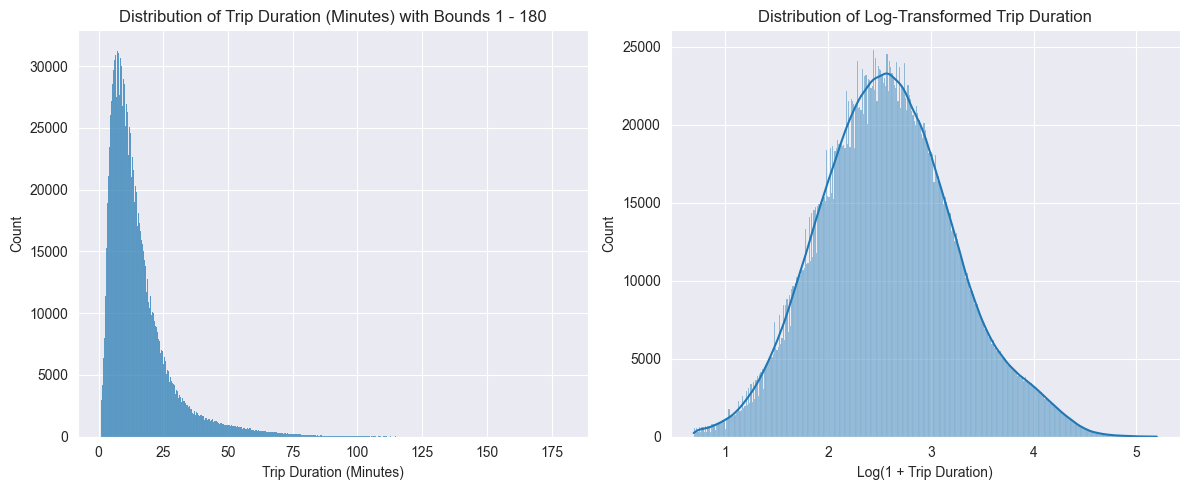

In [62]:
# Take a look at the plots created before, now after limiting the trip duration to 3 hours.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'])
plt.title('Distribution of Trip Duration (Minutes) with Bounds 1 - 180')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['log_trip_duration'], kde=True)
plt.title('Distribution of Log-Transformed Trip Duration')
plt.xlabel('Log(1 + Trip Duration)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [63]:
#Missing values
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
cbd_congestion_fee       0
hour_of_day              0
day_of_week              0
is_weekend               0
trip_duration            0
log_trip_duration        0
dtype: int64


No missing values at this point.

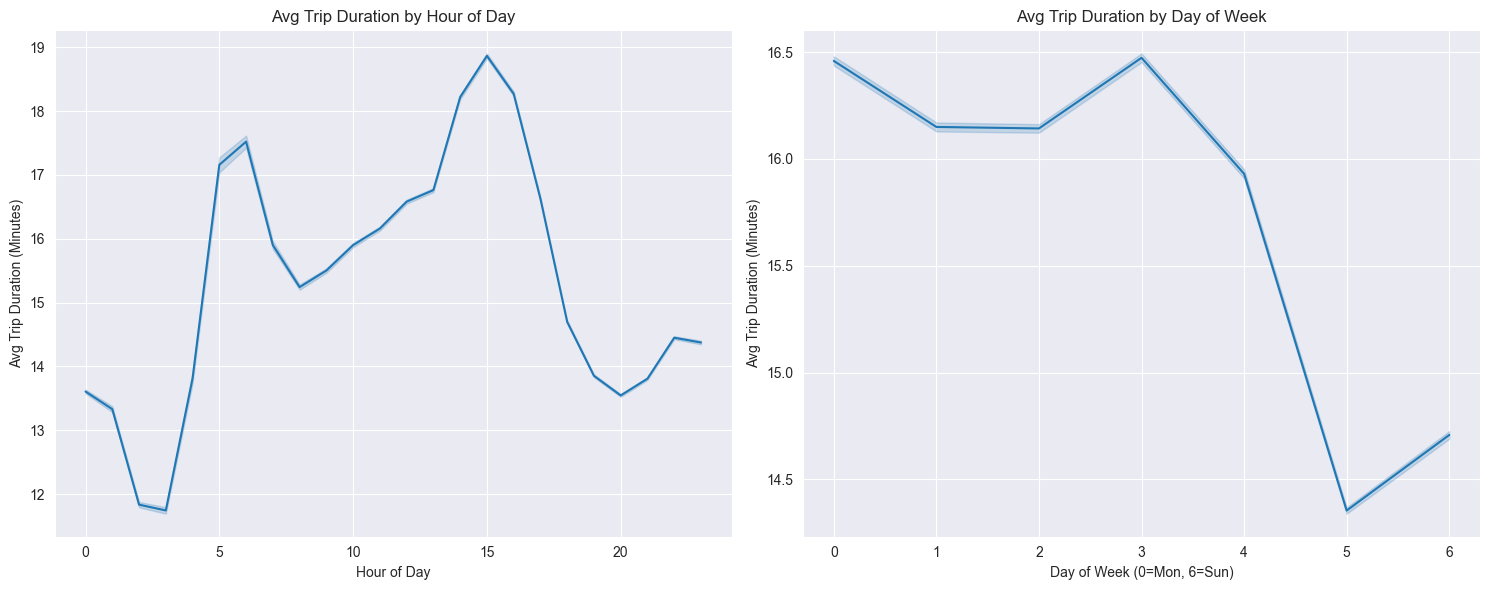

In [64]:
# Plot the average trip duration by these new features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour_of_day', y='trip_duration', data=df, errorbar='se')
plt.title('Avg Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Trip Duration (Minutes)')

plt.subplot(1, 2, 2)
sns.lineplot(x='day_of_week', y='trip_duration', data=df, errorbar='se')
plt.title('Avg Trip Duration by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Avg Trip Duration (Minutes)')

plt.tight_layout()
plt.show()

Insights: spikes in trip duration during traditional commuting hours, with shorter trips on the weekends.  I'll break this down by day to see if the week days are different from the weekends.  It would be nice to have a mph calculated to see if the trips are just shorter or if they're faster.

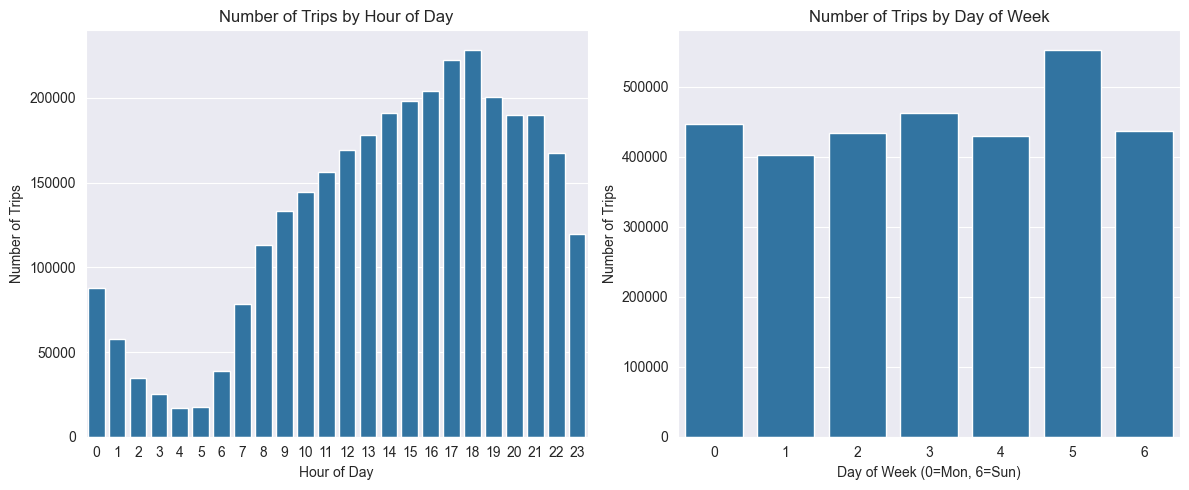

In [66]:
# Plot trip counts by time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='hour_of_day', data=df)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

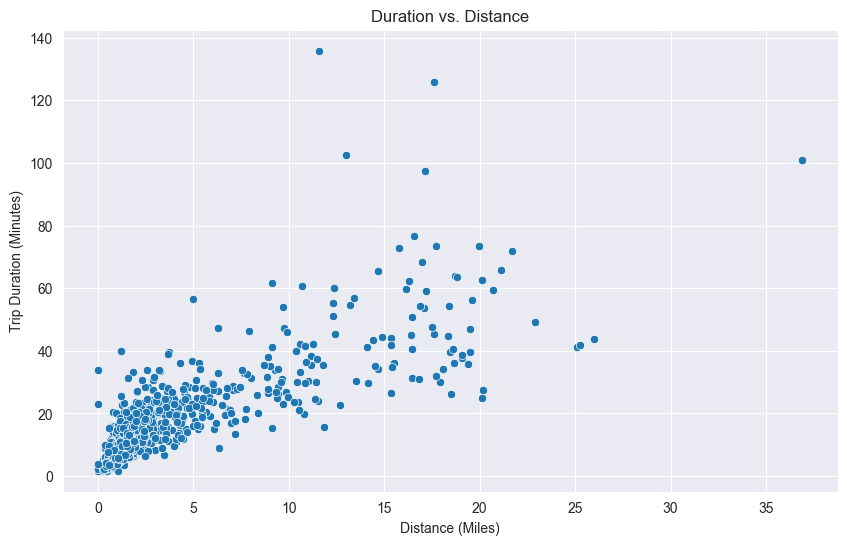

In [67]:
# Plotting distance vs. trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='trip_duration', data=df.sample(min(1000, len(df)))) # Sample for large data
plt.title('Duration vs. Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

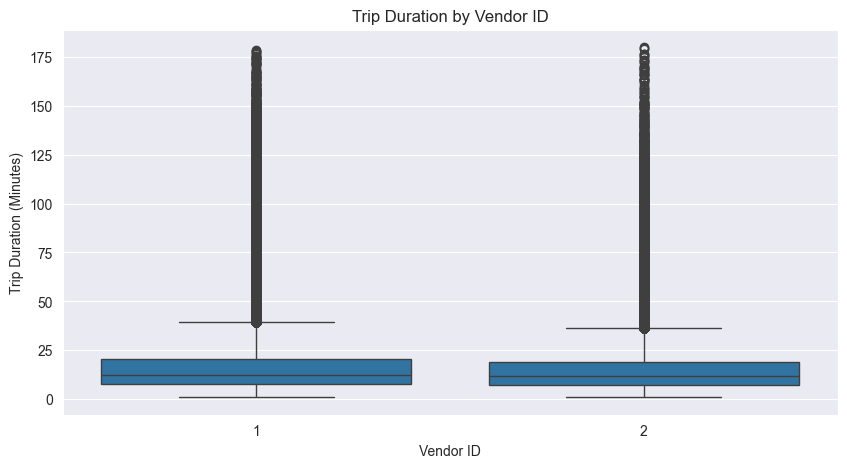


Vendor ID counts:
VendorID
2    2468914
1     695519
Name: count, dtype: int64


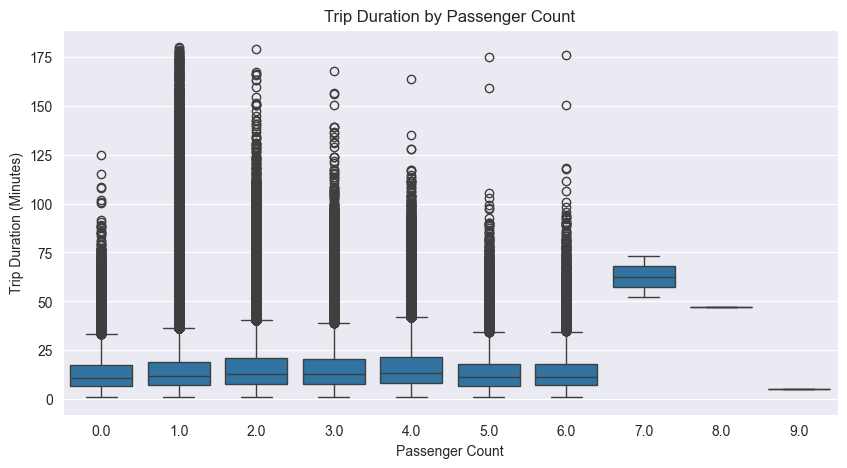


Passenger Count distribution:
passenger_count
1.0    2521697
2.0     433124
3.0      98247
4.0      60872
0.0      21980
5.0      18345
6.0      10163
9.0          2
7.0          2
8.0          1
Name: count, dtype: int64


In [68]:
# other variable analysis section
# Vendor ID analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='VendorID', y='trip_duration', data=df)
plt.title('Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

print("\nVendor ID counts:")
print(df['VendorID'].value_counts())

# Passenger Count analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='passenger_count', y='trip_duration', data=df)
plt.title('Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

print("\nPassenger Count distribution:")
print(df['passenger_count'].value_counts())

Insights: trips are similar for both vendors, passenger count doesn't really have an impact on average trip duration.

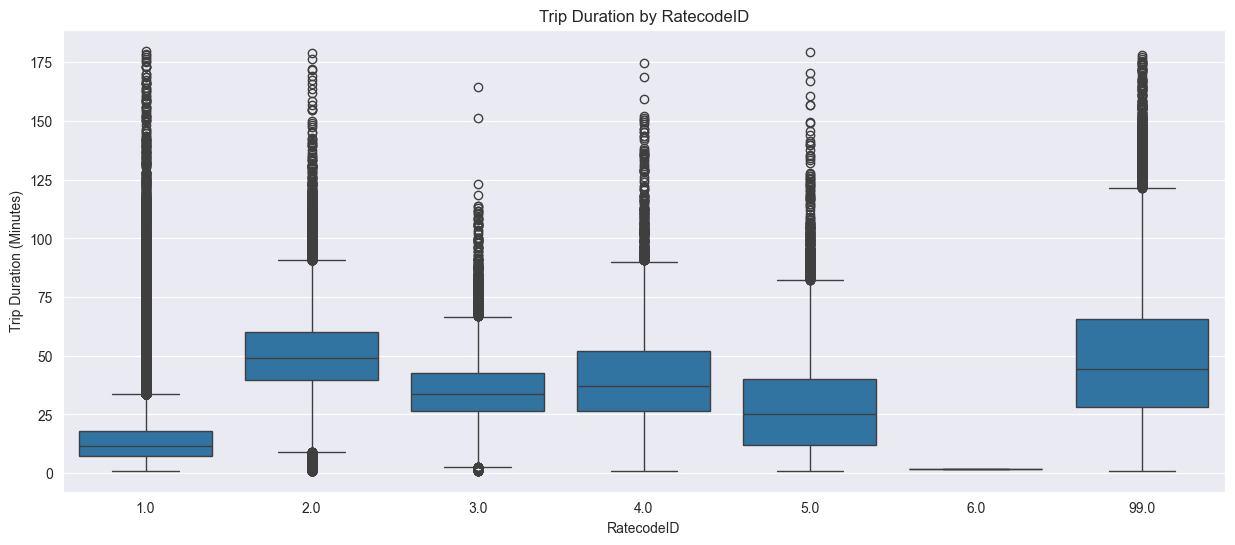

In [75]:
# airport trips, JFK RatecodeID = 2, Newark = 3
plt.figure(figsize=(15, 6))

sns.boxplot(x='RatecodeID', y='trip_duration', data=df)
plt.title('Trip Duration by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

Insights: the standard rate fare is the fastest on average, and trips to JFK take the longest on average.

In [82]:
# Calculate Average Speed
df.loc[:, 'avg_speed_mph'] = (df.loc[:, 'trip_distance'] / df.loc[:, 'trip_duration']) * 60
# Handle potential division by zero or very small duration
df.loc[:, 'avg_speed_mph'] = df.loc[:, 'avg_speed_mph'].replace([np.inf, -np.inf], np.nan)
df.loc[:, 'avg_speed_mph'] = df.loc[:, 'avg_speed_mph'].fillna(0) # Or a reasonable average

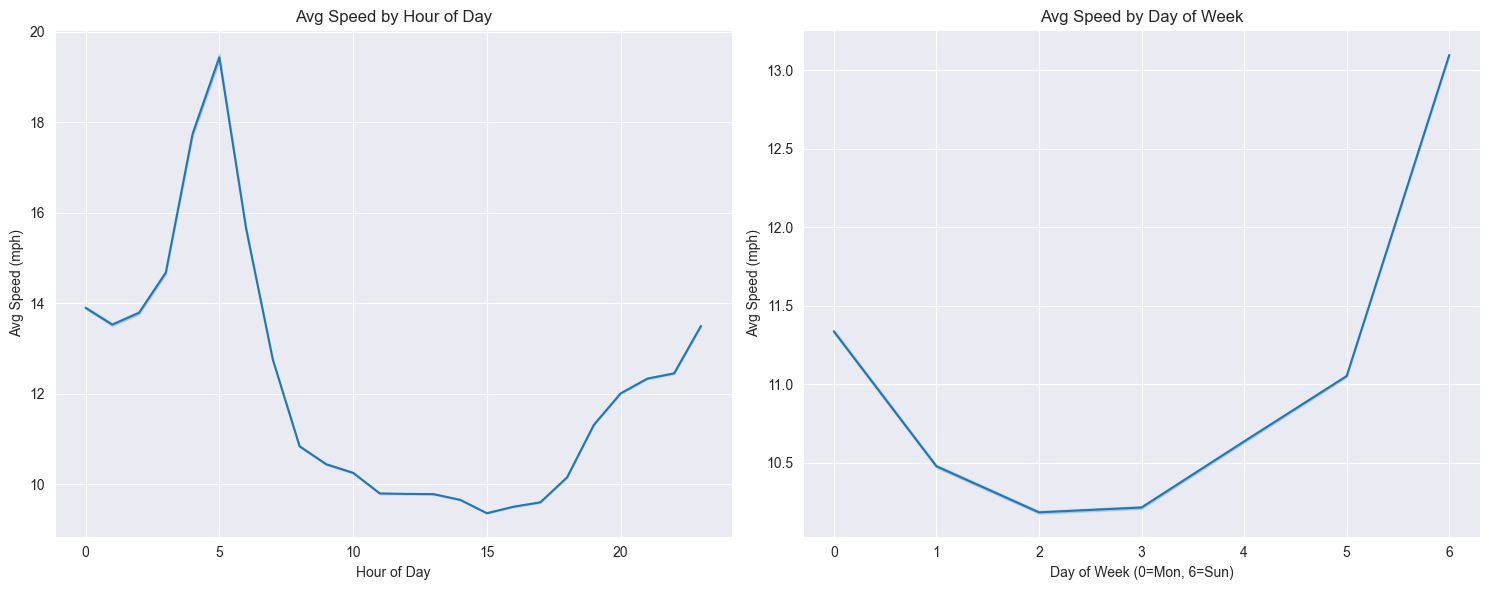

In [83]:
# Plot average speed by time features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour_of_day', y='avg_speed_mph', data=df, errorbar='se')
plt.title('Avg Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Speed (mph)')

plt.subplot(1, 2, 2)
sns.lineplot(x='day_of_week', y='avg_speed_mph', data=df, errorbar='se')
plt.title('Avg Speed by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Avg Speed (mph)')
plt.tight_layout()
plt.show()

## Analysis - Model Building and Training

### Linear Regression (Multivariate)


Training set shape: (2495875, 7), (2495875,)
Test set shape: (623969, 7), (623969,)

--- Training Linear Regression Model ---
Model training complete.
Model Intercept: 2.40
Model Coefficients:
trip_distance      0.121035
passenger_count    0.012599
hour_of_day        0.001774
PULocationID      -0.000101
DOLocationID      -0.000249
dtype: float64
Mean Squared Error (MSE) on original scale: 90.49 minutes^2
Root Mean Squared Error (RMSE) on original scale: 9.51 minutes
Mean Absolute Error (MAE) on original scale: 5.74 minutes
R-squared (R2) on original scale: 0.4133


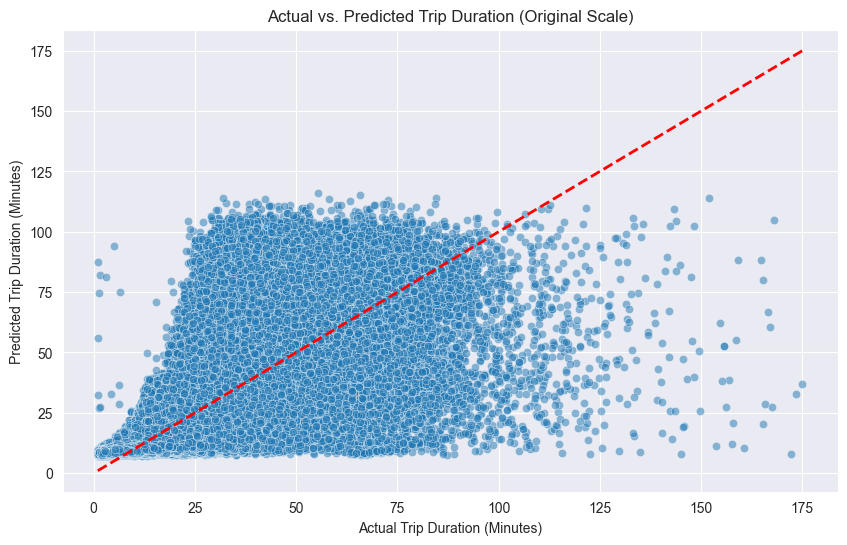

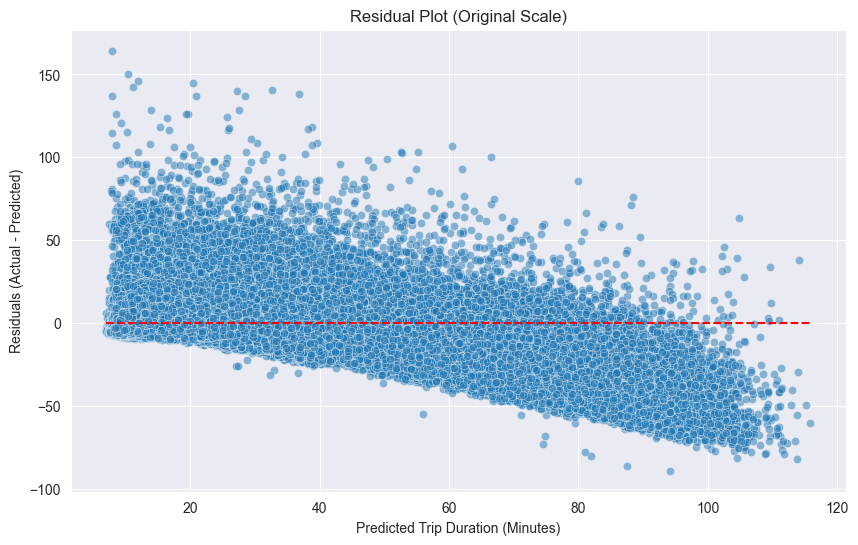

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
# Use the log-transformed trip duration as the target variable for better model performance
target = 'log_trip_duration'
features = [
    'trip_distance',            # numerical
    #'avg_speed_mph',       # numerical
    'VendorID',                  # Categorical
    'passenger_count',           # Can be numerical or categorical, treat as numerical here
    'hour_of_day',               # Categorical (time of day)
    'day_of_week',               # Categorical (day of week)
    'PULocationID',              # Categorical (pickup zone ID)
    'DOLocationID'              # Categorical (dropoff zone ID)
]

X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

print("\n--- Training Linear Regression Model ---")
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")
print(f"Model Intercept: {model.intercept_:.2f}")
# You can also inspect coefficients if interested in feature importance (for linear models)
print("Model Coefficients:")
print(pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False).head())

y_pred = model.predict(X_test)

# Convert predictions back to original scale for interpretation
# expm1 is the inverse of log1p
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

# Metrics on original scale are more intuitive
mse_orig = mean_squared_error(y_test_original, y_pred_original)
rmse_orig = np.sqrt(mse_orig)
mae_orig = mean_absolute_error(y_test_original, y_pred_original)
r2_orig = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE) on original scale: {mse_orig:.2f} minutes^2")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse_orig:.2f} minutes")
print(f"Mean Absolute Error (MAE) on original scale: {mae_orig:.2f} minutes")
print(f"R-squared (R2) on original scale: {r2_orig:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Trip Duration (Original Scale)')
plt.xlabel('Actual Trip Duration (Minutes)')
plt.ylabel('Predicted Trip Duration (Minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original, y=(y_test_original - y_pred_original), alpha=0.5)
plt.hlines(y=0, xmin=y_pred_original.min(), xmax=y_pred_original.max(), colors='red', linestyles='dashed')
plt.title('Residual Plot (Original Scale)')
plt.xlabel('Predicted Trip Duration (Minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

Residual plot insights: clear non-linear trend (downward), model under-predicts on shorter trips, over-predicts on longer ones.  Model shows systematically biased.  We would like the residuals to be randomly scattered around the x-axis.  There is some heteroscedasticity present, shorter trips have more variance and predictions narrow as duration increases.

### Random Forest Regressor

In [103]:
# ~5min
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_rf_original = np.expm1(y_pred_rf)

mse_rf_orig = mean_squared_error(y_test_original, y_pred_rf_original)
rmse_rf_orig = np.sqrt(mse_rf_orig)
mae_rf_orig = mean_absolute_error(y_test_original, y_pred_rf_original)
r2_rf_orig = r2_score(y_test_original, y_pred_rf_original)

print(f"\nRandom Forest MSE (original scale): {mse_rf_orig:.2f} minutes^2")
print(f"Random Forest RMSE (original scale): {rmse_rf_orig:.2f} minutes")
print(f"Random Forest MAE (original scale): {mae_rf_orig:.2f} minutes")
print(f"Random Forest R-squared (original scale): {r2_rf_orig:.4f}")


Random Forest MSE (original scale): 24.70 minutes^2
Random Forest RMSE (original scale): 4.97 minutes
Random Forest MAE (original scale): 2.86 minutes
Random Forest R-squared (original scale): 0.8398


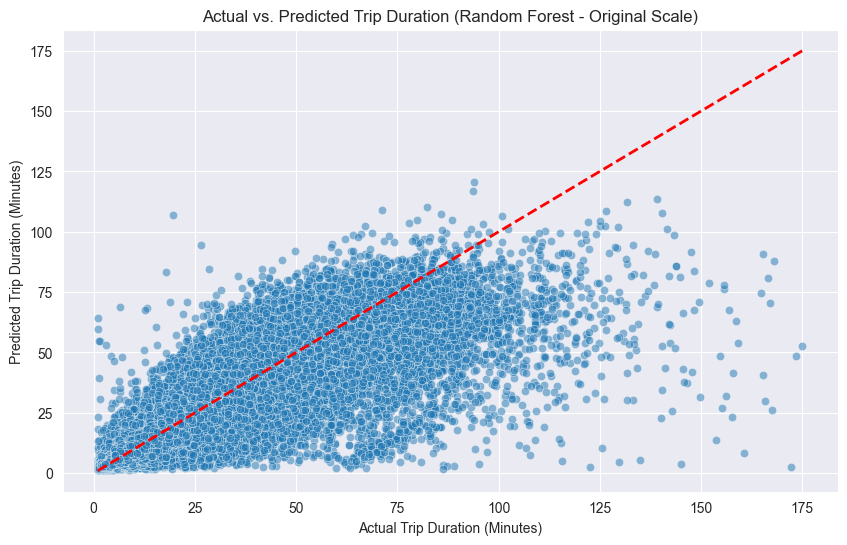

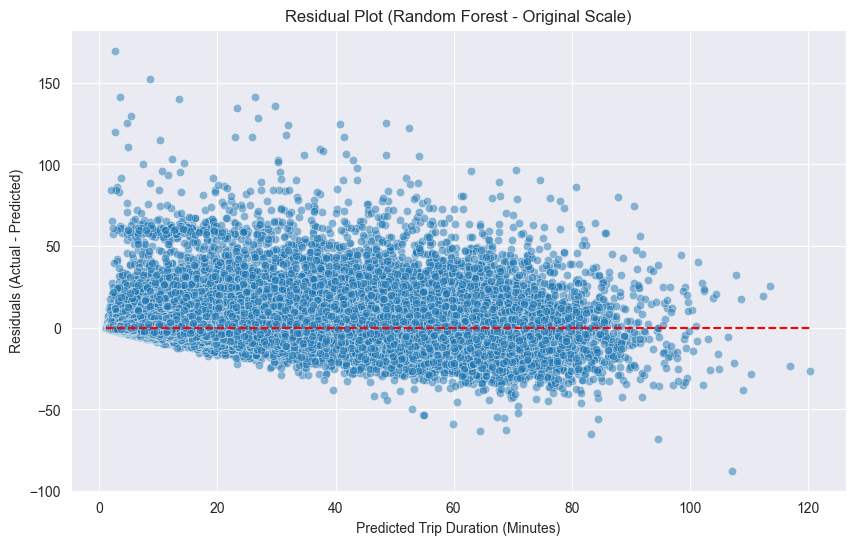

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_rf_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Trip Duration (Random Forest - Original Scale)')
plt.xlabel('Actual Trip Duration (Minutes)')
plt.ylabel('Predicted Trip Duration (Minutes)')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf_original, y=(y_test_original - y_pred_rf_original), alpha=0.5)
plt.hlines(y=0, xmin=y_pred_rf_original.min(), xmax=y_pred_rf_original.max(), colors='red', linestyles='dashed')
plt.title('Residual Plot (Random Forest - Original Scale)')
plt.xlabel('Predicted Trip Duration (Minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

Insights: Random forests can model complex non-linear relationships and interactions between features, obviously much better than linear regression.  Compared to previous residual plot we see a reduced downward trend, much more randomly scattered around x-axis.  Mostly improved homoscedasticity, not perfectly uniform.  Still have very positive residuals for shorter trips.  There are probably specific factors impacting very short trips.

trip_distance      0.789772
hour_of_day        0.059468
DOLocationID       0.056517
PULocationID       0.049843
day_of_week        0.028508
passenger_count    0.009485
VendorID           0.006406
dtype: float64


C:\Users\spencer\AppData\Local\Temp\ipykernel_40804\2899648330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances.head(15).values, y=sorted_importances.head(15).index, palette='viridis')


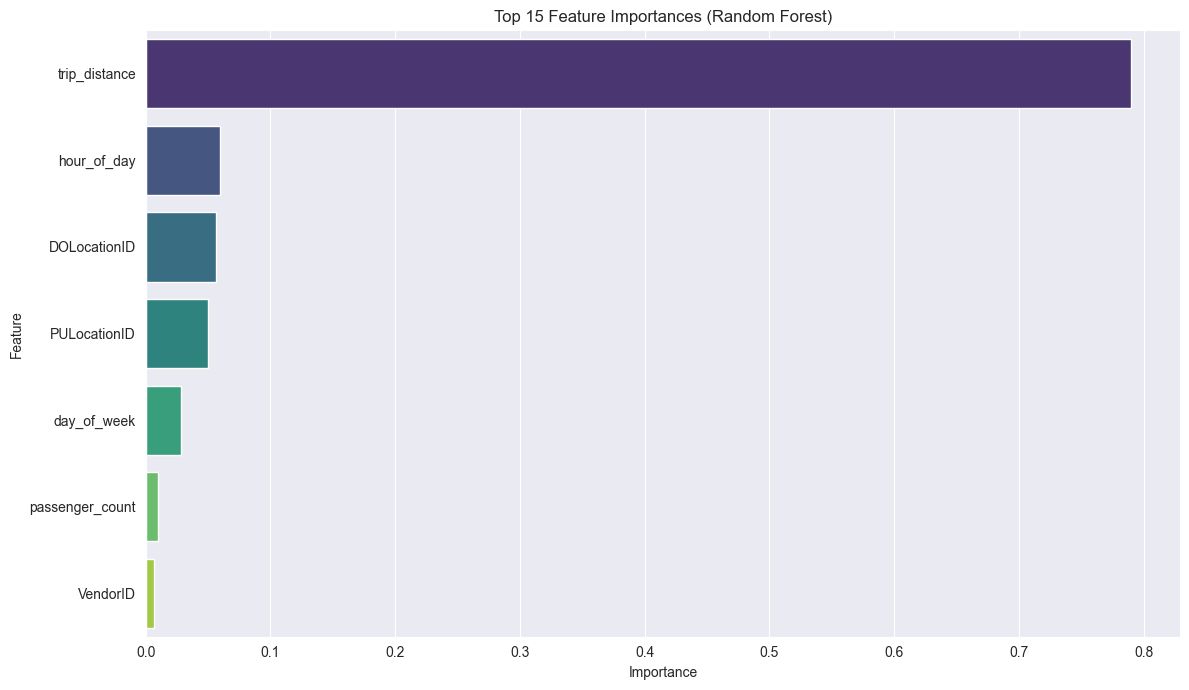

In [105]:
# Get feature importances from the trained model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort them for better readability
sorted_importances = feature_importances.sort_values(ascending=False)

print(sorted_importances.head(10)) # Print top 10 most important features

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_importances.head(15).values, y=sorted_importances.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Insights: The random forest model combines predictions from multiple decision trees, which reduces the risk of overfitting that individual decision trees might exhibit.  As expected, there is a noticeable improvement in RMSE, MAE, and
R-squared over the linear regression model.

### Gradient Boosting Machine


Gradient Boosting MSE (original scale): 35.13 seconds^2
Gradient Boosting RMSE (original scale): 5.93 seconds
Mean Absolute Error (MAE) (original scale): 3.41 seconds
R-squared (R2) (original scale): 0.7722
trip_distance      0.919191
hour_of_day        0.044890
DOLocationID       0.012899
day_of_week        0.010513
PULocationID       0.009935
VendorID           0.002225
passenger_count    0.000348
dtype: float64


C:\Users\spencer\AppData\Local\Temp\ipykernel_40804\1076643645.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_gb.head(15).values, y=sorted_importances_gb.head(15).index, palette='viridis')


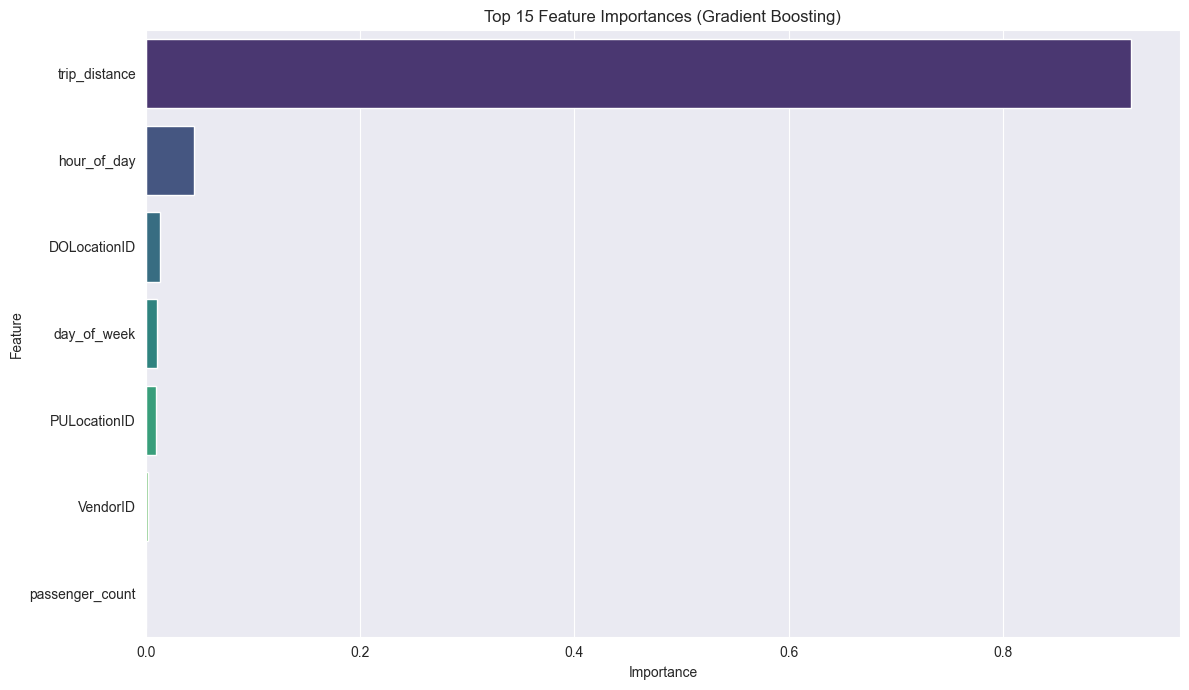

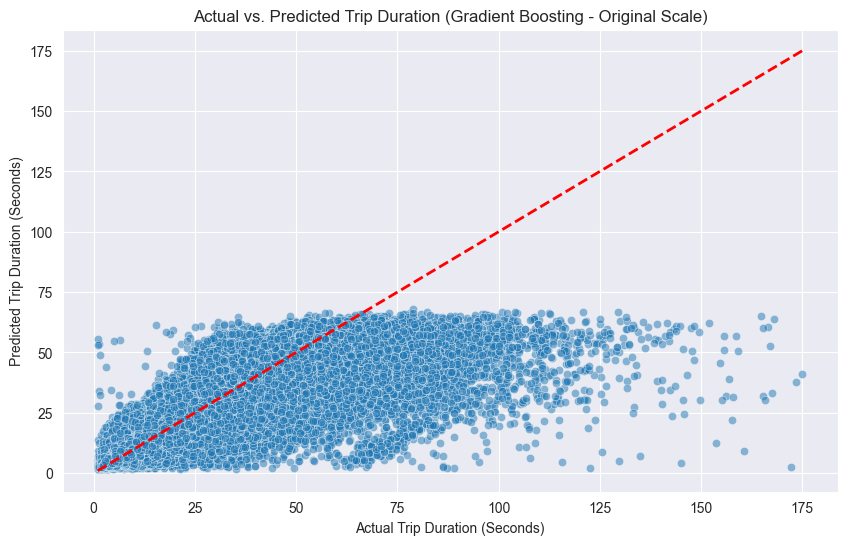

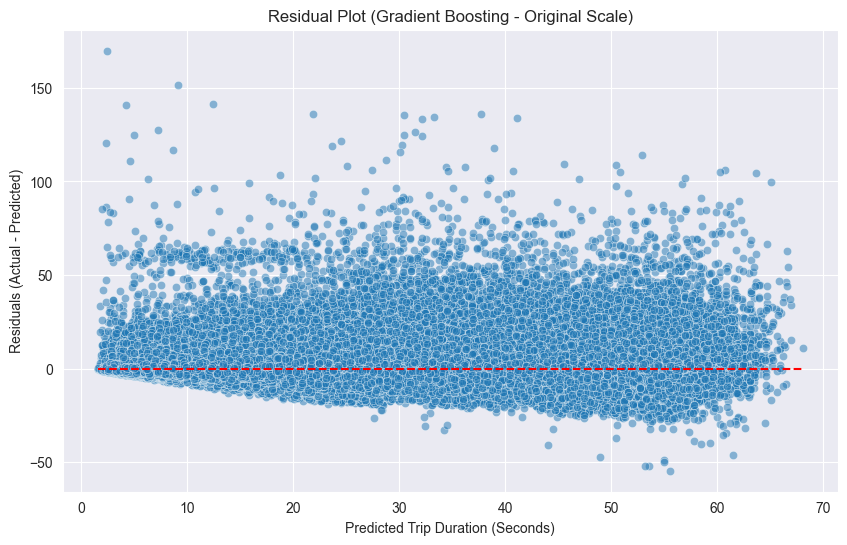

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_gb_original = np.expm1(y_pred_gb)

mse_gb_orig = mean_squared_error(y_test_original, y_pred_gb_original)
rmse_gb_orig = np.sqrt(mse_gb_orig)
mae_gb_orig = mean_absolute_error(y_test_original, y_pred_gb_original)
r2_gb_orig = r2_score(y_test_original, y_pred_gb_original)

print(f"\nGradient Boosting MSE (original scale): {mse_gb_orig:.2f} seconds^2")
print(f"Gradient Boosting RMSE (original scale): {rmse_gb_orig:.2f} seconds")
print(f"Mean Absolute Error (MAE) (original scale): {mae_gb_orig:.2f} seconds")
print(f"R-squared (R2) (original scale): {r2_gb_orig:.4f}")

feature_importances_gb = pd.Series(gb_model.feature_importances_, index=X_train.columns)

# Sort them for better readability
sorted_importances_gb = feature_importances_gb.sort_values(ascending=False)

print(sorted_importances_gb.head(10)) # Print top 10 most important features

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_importances_gb.head(15).values, y=sorted_importances_gb.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_gb_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Trip Duration (Gradient Boosting - Original Scale)')
plt.xlabel('Actual Trip Duration (Minutes)')
plt.ylabel('Predicted Trip Duration (Minutes)')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gb_original, y=(y_test_original - y_pred_gb_original), alpha=0.5)
plt.hlines(y=0, xmin=y_pred_gb_original.min(), xmax=y_pred_gb_original.max(), colors='red', linestyles='dashed')
plt.title('Residual Plot (Gradient Boosting - Original Scale)')
plt.xlabel('Predicted Trip Duration (Minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


Actual v predicted insights: the models predictions seem to cap out at 70 minutes on the y-axis.  Model is having difficulty predicting longer trips.  Further hyperparameter tuning might help this model, or adding in more features that are relevant to longer trips (??) might help too.

## Result/Evaluation
Evaluation metrics that we use included RMSE, MAE, and R-squared.  We also visualized the plot of actual vs predicted and the residual plots of each model.

## Discussion/Conclusion